Team: Ekemini Ekong, Brice Robert

## Part I – Implementing a kNN from scratch:

Use this notebook to run experiments and plot results easily. You do not need to submit it, but you may use some of the generated plots in your report.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from knn import KNN

In [2]:
import utils

In [3]:
data_folder = 'data/'

In [4]:
#1- Data loading
import pandas as pd
training_ds = pd.read_csv(data_folder + 'training.csv', sep=',')
training_ds.describe()

,X1,X2,y
count,2800.000000,2800.000000,2800.000000
mean,0.513191,0.530130,0.507857
std,1.110650,1.022037,0.500028
min,-2.849323,-2.479585,0.000000
25%,-0.263694,-0.191209,0.000000
50%,0.452791,0.445602,1.000000
75%,1.223723,1.195412,1.000000
max,5.043831,5.432484,1.000000


In [5]:

X = training_ds[["X1", "X2"]].to_numpy()
y = training_ds["y"].to_numpy()

X[:,:][1:5], y[1:5]

(array([[ 0.44759256,  0.55980716],
        [ 0.74922924, -0.43377964],
        [-0.28928732,  1.53683223],
        [ 3.6750823 ,  2.14691204]]),
 array([1., 0., 1., 1.]))

In [6]:
#we add the column of ones to X. Check scikit-learn documentation to see how this is achieved
X = training_ds[["X1", "X2"]].to_numpy()
y = training_ds["y"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

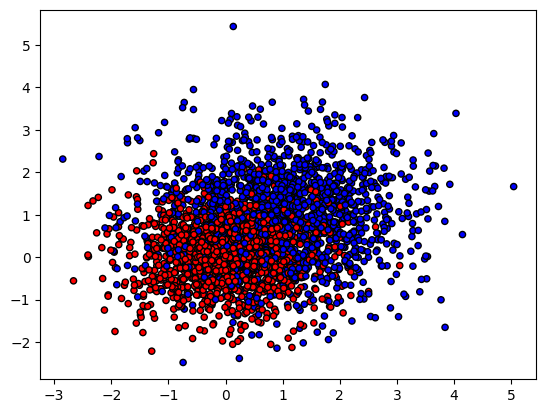

In [7]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.show()

In [8]:
# Only 5 k
clf = KNN(k=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
print(y_pred[:][1:10])

[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0]


In [10]:
# Manually checking the accuracy
acc = clf.accuracy_score(y_test, y_pred)

In [11]:
print("accuracy: ", np.round(acc*100,2),"%")

accuracy:  78.04 %


In [12]:
# Increasing k
Ks=[5,25,50,75,100,125,150,200]
for k in Ks:
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    # p > 2
    y_pred = clf.minkowski_prediction(X_test,3)
    # Manually checking the accuracy
    acc = clf.accuracy_score(y_test, y_pred)
    print("accuracy: ", np.round(acc*100,2),"%","with ",k,"neighbors")

accuracy:  77.5 % with  5 neighbors
accuracy:  79.82 % with  25 neighbors
accuracy:  80.36 % with  50 neighbors
accuracy:  78.39 % with  75 neighbors
accuracy:  78.57 % with  100 neighbors
accuracy:  78.93 % with  125 neighbors
accuracy:  79.29 % with  150 neighbors
accuracy:  80.0 % with  200 neighbors


In [13]:
# Increasing k
Ks=range(200,250)
for k in Ks:
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    # p > 2
    y_pred = clf.minkowski_prediction(X_test,3)
    # Manually checking the accuracy
    acc = clf.accuracy_score(y_test, y_pred)
    print("accuracy: ", np.round(acc*100,2),"%","with ",k,"neighbors")

accuracy:  80.0 % with  200 neighbors
accuracy:  80.18 % with  201 neighbors
accuracy:  80.0 % with  202 neighbors
accuracy:  80.36 % with  203 neighbors
accuracy:  80.18 % with  204 neighbors
accuracy:  80.18 % with  205 neighbors
accuracy:  80.18 % with  206 neighbors
accuracy:  80.18 % with  207 neighbors
accuracy:  80.18 % with  208 neighbors
accuracy:  80.0 % with  209 neighbors
accuracy:  79.82 % with  210 neighbors
accuracy:  79.82 % with  211 neighbors
accuracy:  80.0 % with  212 neighbors
accuracy:  79.64 % with  213 neighbors
accuracy:  79.82 % with  214 neighbors
accuracy:  79.82 % with  215 neighbors
accuracy:  80.18 % with  216 neighbors
accuracy:  80.18 % with  217 neighbors
accuracy:  80.0 % with  218 neighbors
accuracy:  80.18 % with  219 neighbors
accuracy:  80.36 % with  220 neighbors
accuracy:  80.18 % with  221 neighbors
accuracy:  80.36 % with  222 neighbors
accuracy:  80.36 % with  223 neighbors
accuracy:  80.18 % with  224 neighbors
accuracy:  80.36 % with  225 n

In [14]:
# Increasing k
clf = KNN(k=200)
clf.fit(X_train, y_train)
# p > infinity
y_pred = clf.minkowski_prediction(X_test,float('inf'))

In [15]:
print(y_pred[:][1:10])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [16]:
# Manually checking the accuracy
acc = clf.accuracy_score(y_test, y_pred)

In [17]:
print("accuracy: ", np.round(acc*100,2),"%")

accuracy:  50.71 %


### Validation Data Set

In [18]:
#1- Data loading
import pandas as pd
validation_ds = pd.read_csv(data_folder + 'validation.csv', sep=',')
validation_ds.describe()

,X1,X2,y
count,480.000000,480.000000,480.00000
mean,0.477795,0.507273,0.51875
std,1.088680,0.975944,0.50017
min,-2.606940,-2.181850,0.00000
25%,-0.350080,-0.105656,0.00000
50%,0.425585,0.430898,1.00000
75%,1.174725,1.048617,1.00000
max,3.592552,3.581115,1.00000


In [19]:
#we add the column of ones to X. Check scikit-learn documentation to see how this is achieved
X1 = validation_ds[["X1", "X2"]].to_numpy()
y1 = validation_ds["y"].to_numpy()

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=1234)

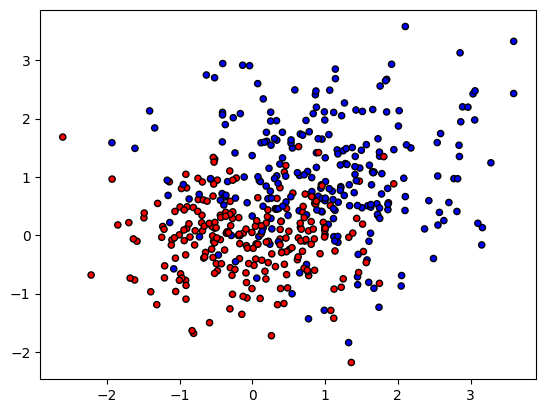

In [20]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure()
plt.scatter(X1[:,0],X1[:,1], c=y1, cmap=cmap_bold, edgecolor='k', s=20)
plt.show()

In [21]:
# Only 5 k
clf = KNN(k=5)
clf.fit(X1_train, y1_train)
y1_pred = clf.minkowski_prediction(X1_test,3)

In [22]:
# Manually checking the accuracy
acc1 = clf.accuracy_score(y1_test, y1_pred)

In [23]:
print("accuracy: ", np.round(acc1*100,2),"%")

accuracy:  84.38 %


# References
- [ ] [How to implement KNN from scratch with Python](https://www.youtube.com/watch?v=rTEtEy5o3X0)
- [ ] [Machine-Learning-From-Scratch/01 KNN](https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/tree/main/01%20KNN)
- [ ] [K-Nearest Neighbors from Scratch with Python](https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch)

## Part II – The curse of dimensionality:

Let ℓ be the edge length of the smallest hyper-cube that contains all k-nearest neighbor of a test point. 
Then 
$$
\mathit{ℓ}^d \approx \frac{k}{n} \text { and } \mathit{ℓ} \approx \frac{k}{n}^{\frac{1}{d}}
$$
. If n=1000, how big is ℓ?


<table>
    <head>
        <tr><th>d</th><th>ℓ</th></tr>
    </head>
        <tr><th>2</th><th>0.1</th></tr>
        <tr><th>10</th><th>0.63</th></tr>
        <tr><th>100</th><th>0.955</th></tr>
        <tr><th>1000</th><th>0.9554</th></tr>
</table>


## Using X1 from the validation data to calculate the distances

In [46]:
def k_distances2(x, k):
    dim0 = x.shape[0]
    dim1 = x.shape[1]
    PP = np.repeat( np.sum(x**2, axis=1),dim0,axis=0 ).reshape(dim0,dim0)
    p =-2*x.dot(x.T)+np.sum(x**2, axis=1).T+PP
    
    p = np.sqrt(p)
    p.sort(axis=1)
    p=p[:,:k]
    pm= p.flatten()
    pm= np.sort(pm)
    return p, pm

/var/folders/c3/1jkjmwxx5vncr00sw0gklknr0000gp/T/ipykernel_68831/2366226080.py:7: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt(p)


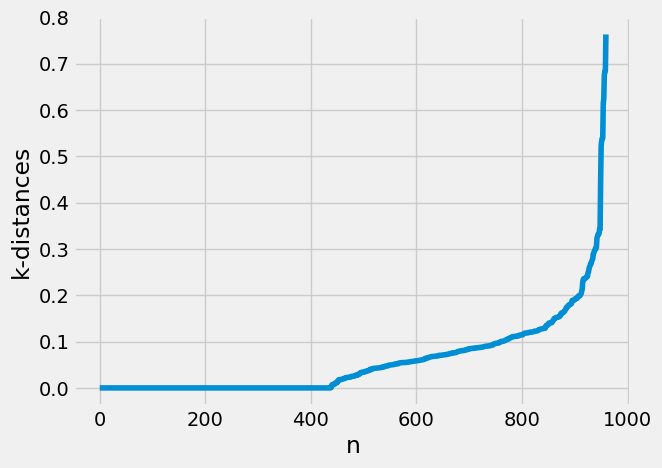

In [49]:
m, m2= k_distances2(X1, 2)
plt.plot(m2)
plt.ylabel("k-distances")
plt.xlabel("n")
plt.grid(True)
plt.show()

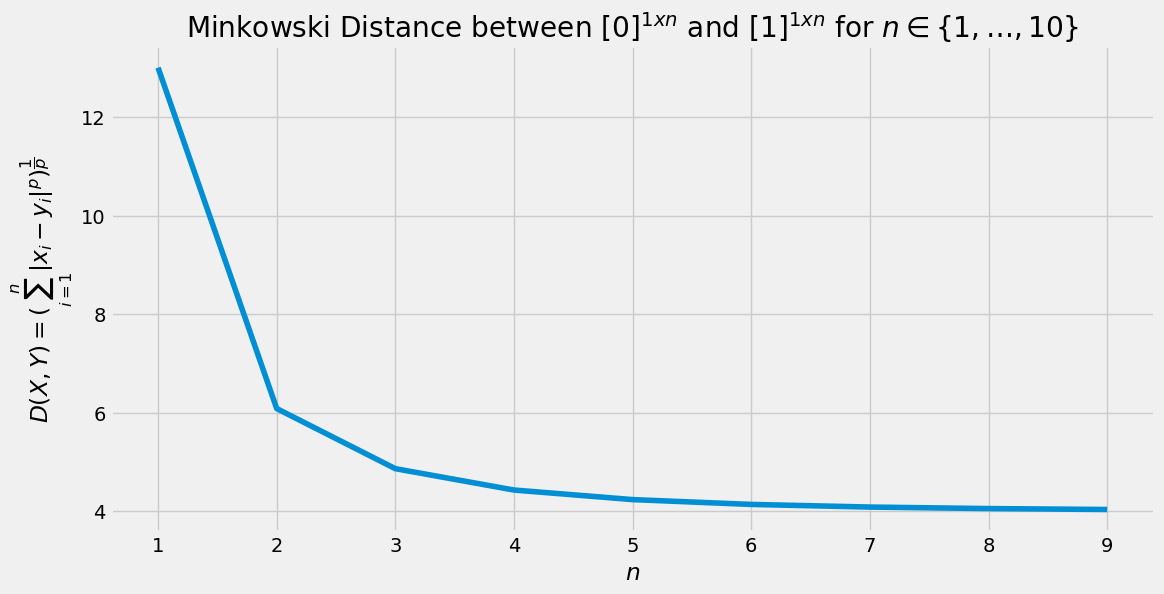

In [24]:
from scipy.spatial import minkowski_distance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

row1 = [10, 20, 15, 10, 5]
row2 = [12, 24, 18, 8, 7]

plt.figure(figsize=(12, 6))
plt.title(
    "Minkowski Distance between $[0]^{1 x n}$ and $[1]^{1 x n}$ for $n \in \{1, \ldots, 10\}$"
)
plt.xlabel('$n$')
plt.ylabel('$ D(X,Y) = ( \sum_{i=1}^n | x_i - y_i |^p )^{\dfrac{1}{p}}$')
plt.plot(range(1, 10), [minkowski_distance(row1,row2, x) for x in range(1, 10)])


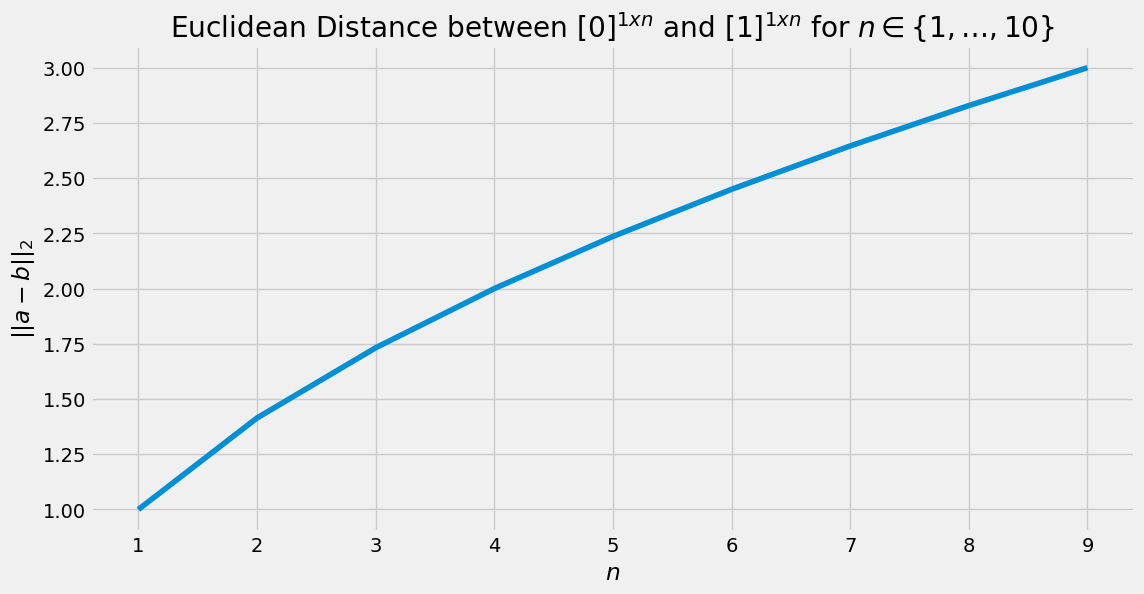

In [25]:

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import numpy as np
plt.figure(figsize=(12, 6))
plt.title(
    "Euclidean Distance between $[0]^{1 x n}$ and $[1]^{1 x n}$ for $n \in \{1, \ldots, 10\}$"
)
plt.xlabel('$n$')
plt.ylabel('$|| a - b ||_2$')
plt.plot(range(1, 10), np.sqrt(range(1, 10)))

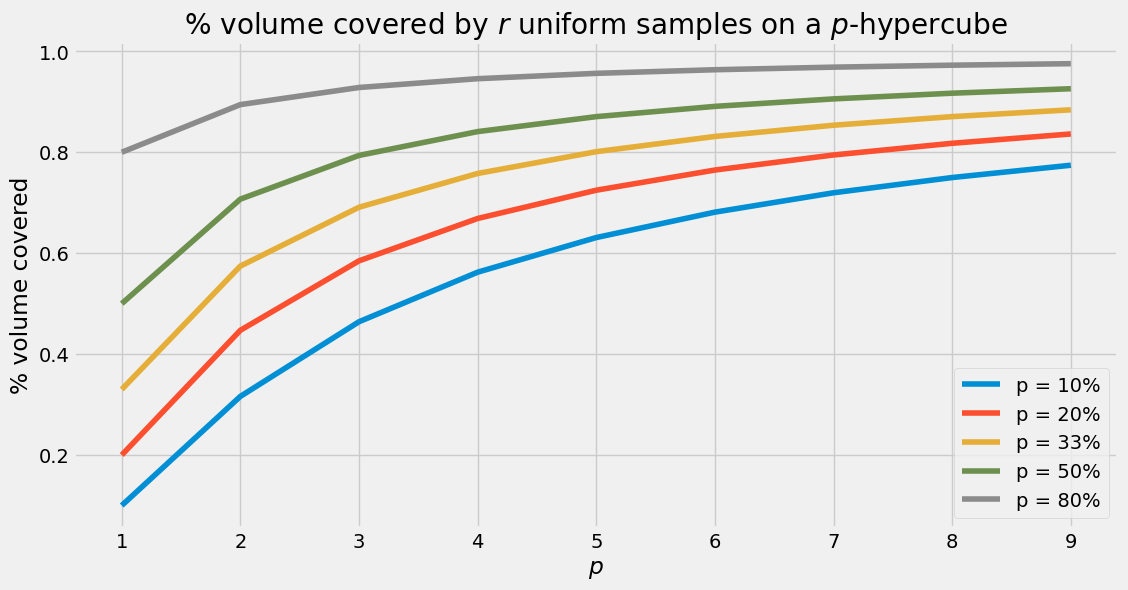

In [26]:
plt.figure(figsize=(12, 6))
plt.title(
    "% volume covered by $r$ uniform samples on a $p$-hypercube"
)
plt.xlabel('$p$')
plt.ylabel('% volume covered')

plt.plot(range(1, 10), [0.1**(1/n)  for n in range(1, 10)], label="p = 10%")
plt.plot(range(1, 10), [0.2**(1/n)  for n in range(1, 10)], label="p = 20%")
plt.plot(range(1, 10), [0.33**(1/n) for n in range(1, 10)], label="p = 33%")
plt.plot(range(1, 10), [0.5**(1/n)  for n in range(1, 10)], label="p = 50%")
plt.plot(range(1, 10), [0.8**(1/n)  for n in range(1, 10)], label="p = 80%")
plt.legend()

# References
- [ ] [Curse of Dimensionality](https://builtin.com/data-science/curse-dimensionality)
- [ ] [Cornell - Lecture 2: k-nearest neighbors: Curse of Dimensionality](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html)